# Visão Computacional - Lista 3

Aqui serão resolvidas as atividades da terceira lista de Visão Computacional pelo aluno Sillas Rocha da Costa, começaremos realizando alguns imports:

In [1]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import numpy as np

# Exercício 1 - Alterando Brilho e Contraste

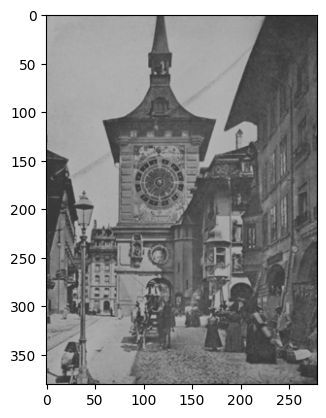

In [2]:
img1 = cv.imread("./PoucoContraste.png")
img1 = img1[::,::-1]

plt.imshow(img1)

In [3]:
def change_img(img, brilho:float=0, contraste:float=1):
    if np.max(img) > 1:
        img = img / 255
        
    img = img + brilho

    r_mean = np.mean(img[:,:,0])
    g_mean = np.mean(img[:,:,1])
    b_mean = np.mean(img[:,:,2])

    img[:,:,0] = contraste * (img[:,:,0] - r_mean) + r_mean
    img[:,:,1] = contraste * (img[:,:,1] - g_mean) + g_mean
    img[:,:,2] = contraste * (img[:,:,2] - b_mean) + b_mean

    img = np.clip(img, 0, 1)

    return img

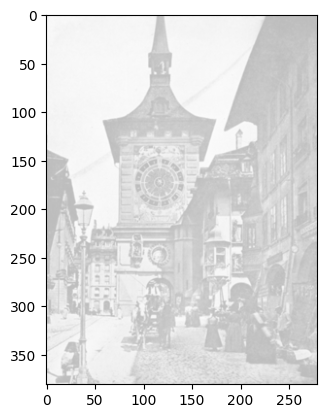

In [4]:
img2 = change_img(img1, 0.4, 0.5)
plt.imshow(img2)

# Exercício 2 - Histograma

In [5]:
def get_list_values(img, brilho:float=0, contraste:float=1):
    img = change_img(img=img, brilho=brilho, contraste=contraste)
    part_img = img[:,:,0]
    lines, cols = img.shape[:2]
    valores = list()
    
    for line in range(lines):
        for col in range(cols):
            valores.append(part_img[line, col])

    return np.array(valores)

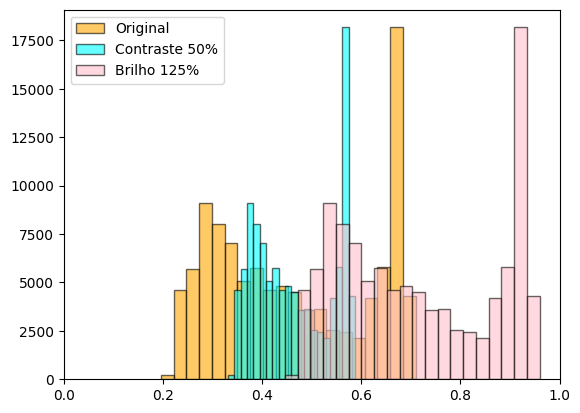

In [6]:
valores_ori = get_list_values(img1)
valores_bri = get_list_values(img1, brilho=0.25)
valores_con = get_list_values(img1, contraste=0.5)

plt.hist(valores_ori, bins=20, color="orange", edgecolor="black", alpha=0.6, label="Original")
plt.hist(valores_con, bins=20, color="cyan", edgecolor="black", alpha=0.6, label="Contraste 50%")
plt.hist(valores_bri, bins=20, color="pink", edgecolor="black", alpha=0.6, label="Brilho 125%")

plt.legend()
plt.xlim(0, 1)

plt.show()

# Exercício 3 - Filtros

In [7]:
def filtro(img, filtro):
    return